<a href="https://colab.research.google.com/github/camaradaneto/Data-Science-class/blob/master/An%C3%A1lise%20de%20mercado%20atacadista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [19]:
data = pd.read_csv('3.12. Example.csv')
data.shape

(30, 2)

In [20]:
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


In [0]:
# Temos o dataset abaixo com avaliações de satisfação e lealdade de uma rede de atacado. A variável latente 'Loyalty' já está padronizada.
# isso é comum de acontecer com dados desse tipo (contínuo).
# colocaremos os dados num gráfico de dispersão para entender o padrão de distribuição e fazer inferências sobre os agrupamentos possiveis.

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

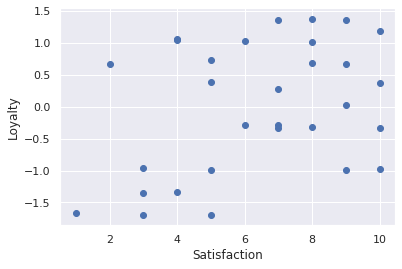

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [0]:
# Visualmente, há dois grupos nos dados. Contudo, o mapa pode ser dividido em 4 (lealdade alta e baixa x satisfação alta e baixa). isso
# indica que criar apenas dois grupos não permitirá uma análise precisa.
# Criaremos uma copia 'x' de 'data' e executaremos o comando kmeans para calcular dois agrupamentos.
# kmeans.fit serve para 'encaixar' o calculo nos dados. depois faremos uma copia de x em 'clusters'
# e criaremos uma coluna para alocar os dados indicando que linha pertence ao grupo 0 e ao grupo 1

In [0]:
x = data.copy()

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

In [0]:
# Abaixo podemos ver que a coluna 'cluster_pred' foi adicionada em 'clusters' por meio do comando kmeans.fit_predict(x)

In [10]:
clusters

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

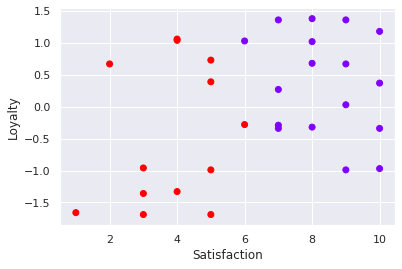

In [9]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [0]:
# o algoritmo dividiu ao meio baseado em Satisfaction pq seus valores são maiores. Isso ocorre com frequencia e há 
# um jeito de solucionar: preprocessing.scale(x) padroniza as variaveis independentemente.

In [0]:
from sklearn import preprocessing

In [16]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [0]:
# Como não sabemos o numero de grupos que precisamos, iremos utilizar o método cotovelo
# criaremos uma lista 'wcss'

In [22]:
wcss = []

for i in range (1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.34807941029098,
 4.380320178840311,
 3.731185392455718]

In [0]:
# Pelo comando, ele executou o teste e obteve o SQG para 1 a 9 agrupamentos. Os valores acima são os quadrados das distâncias médias
# calculadas para cada quantidade de grupos (do 1 ao 9)
# Vamos plotar para ver o método cotovelo e descobrir a qtdade ótima de grupos

Text(0, 0.5, 'wcss')

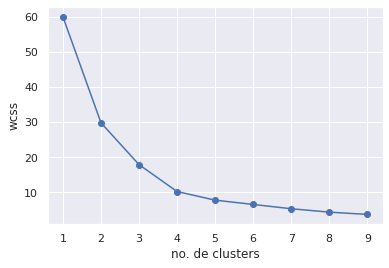

In [36]:
plt.plot(range(1,10), wcss, marker='o')
plt.xlabel('no. de clusters')
plt.ylabel('wcss')

In [0]:
# Vamos testar a diferença para 3 e 4 grupos

In [0]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [40]:
clusters_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2


In [0]:
# os números em 'Satisfaction' estão no original, mas a solução 'cluster_pred' foi tomada em cima dos dados padronizados.
# Isso occore pq, ao plotarmos os dados, os números originais fornecem visualização correta já que os dados padronizados iriam
# deslocar o zero, a média, etc. Então trabalhamos com os números originais, enquanto o programa trabalha com os grupos baseados nos
# números padronizados.

Text(0, 0.5, 'Loyalty')

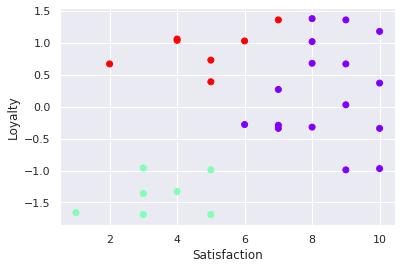

In [43]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Text(0, 0.5, 'Loyalty')

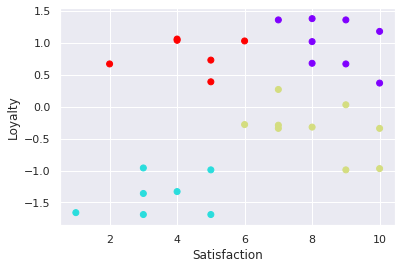

In [44]:
kmeans_new2 = KMeans(4)
kmeans_new2.fit(x_scaled)
clusters_new2 = x.copy()
clusters_new2['cluster_pred'] = kmeans_new2.fit_predict(x_scaled)
plt.scatter(clusters_new2['Satisfaction'], clusters_new2['Loyalty'], c=clusters_new2['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')